### Import Libraries

In [352]:
import pandas as pd
import numpy as np
import random

#notebook reproducible 
np.random.seed(42)
random.seed(42)

# visualization
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
import missingno as msno
from pandas_profiling import ProfileReport
from IPython.display import IFrame
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

# Preprocessing pipeline for Numerical and Categorical features
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings('ignore')

In [357]:
plt.style.use('fivethirtyeight') #ggplot #fivethirtyeight #seaborn-dark
font = {'family' : 'Georgia',
        'weight' : 'normal',
        'size'   : 14}
matplotlib.rc('font', **font)

sns.set_style('darkgrid')
sns.set(font_scale=1.3)

### Reading and understanding the data

In [235]:
# reading the data
data = pd.read_excel('../data/Week1_challenge_data_source.xlsx')

In [303]:
df = data.copy()

In [306]:
data

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,2019-04-29 07:28:42,451.0,2019-04-30 06:02:33,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,2019-04-29 07:28:42,483.0,2019-04-30 10:41:33,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,2019-04-29 07:28:43,283.0,2019-04-30 10:46:12,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,2019-04-29 07:28:43,696.0,2019-04-30 10:40:34,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [307]:
#Check the sample values using df.head()
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [308]:
print(f" There are {df.shape[0]} rows and {df.shape[1]} columns")

 There are 150001 rows and 55 columns


In [309]:
#Get the columns wise info - Datatypes and missing values

df.info(verbose = True, null_counts = True) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 149010 non-null  float64       
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [310]:
df.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


## Task 1

`Full user overview`

    * check for missing values - total number of missing values and percentage of missing values present in the dataset are quantified

In [311]:
# Total missing values
mis_values = (df.isnull().sum().to_frame('sum of missing values')).sort_values('sum of missing values', ascending=False)

# Cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('percent of null value')).sort_values('percent of null value', ascending=False)


In [312]:
# concat the values and convert to dataframe
mis_val_table = pd.concat([mis_values, df_missing_columns], axis=1)

In [313]:
mis_val_table

,sum of missing values,percent of null value
Nb of sec with 37500B < Vol UL,130254,86.84
Nb of sec with 6250B < Vol UL < 37500B,111843,74.56
Nb of sec with 125000B < Vol DL,97538,65.02
TCP UL Retrans. Vol (Bytes),96649,64.43
Nb of sec with 31250B < Vol DL < 125000B,93586,62.39
Nb of sec with 1250B < Vol UL < 6250B,92894,61.93
Nb of sec with 6250B < Vol DL < 31250B,88317,58.88
TCP DL Retrans. Vol (Bytes),88146,58.76
HTTP UL (Bytes),81810,54.54
HTTP DL (Bytes),81474,54.32


`We can also use the missingno package to generate visual representations of missingness in data.`

`Relationship between missing values such as missing together with other columns or missing during specific weeks, months, etc can be captured. in our case we can see that column - * Avg RTU DL and Avg RTT UL do have pattern`

<AxesSubplot:>

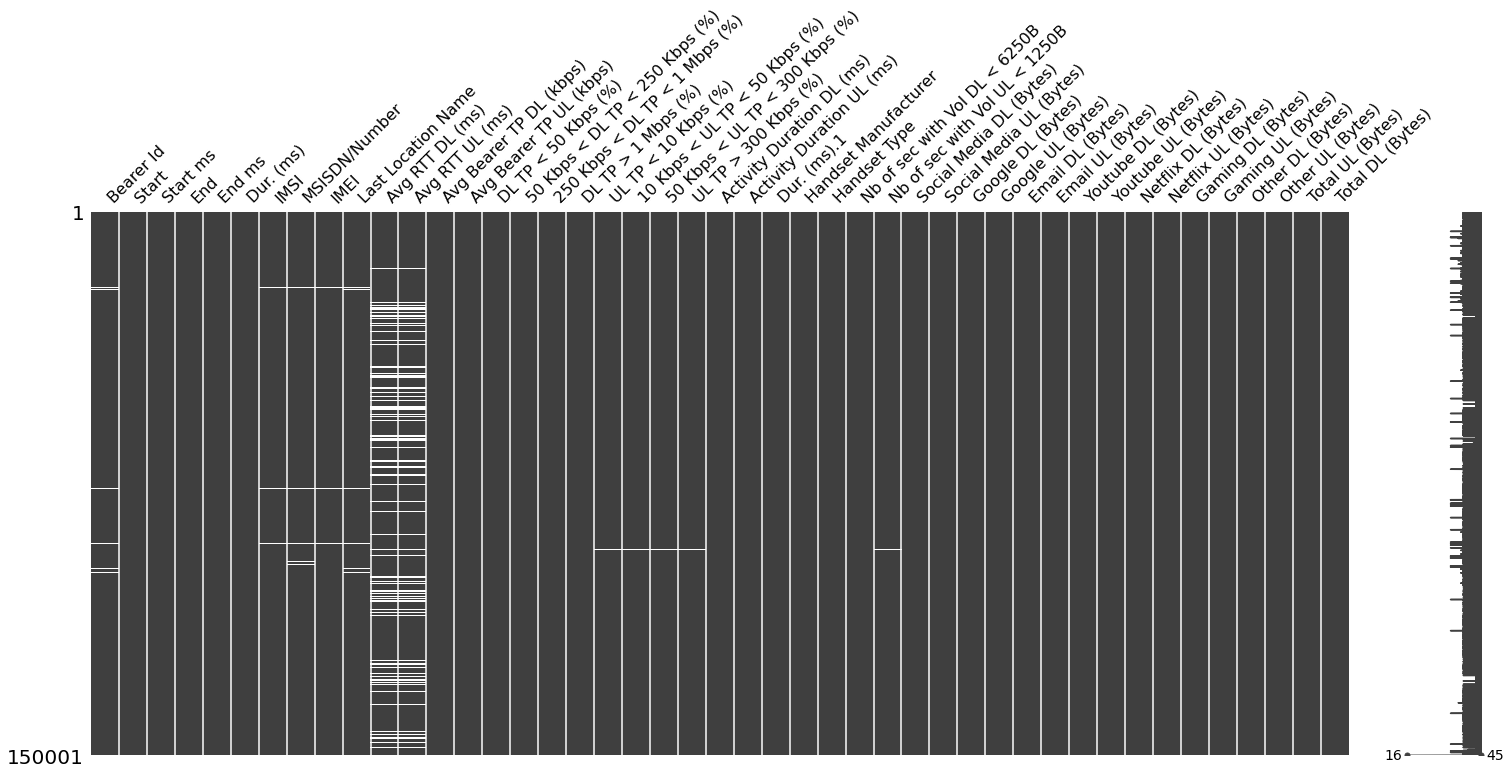

In [318]:
# missing values visualization
msno.matrix(df)

In [315]:
# List the columns having more than 30% missing values
col_list_missing_30 = list(df_missing_columns.index[df_missing_columns['percent of null value'] > 30])
pprint(col_list_missing_30)

['Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with 125000B < Vol DL',
 'TCP UL Retrans. Vol (Bytes)',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'TCP DL Retrans. Vol (Bytes)',
 'HTTP UL (Bytes)',
 'HTTP DL (Bytes)']


`* Delete columns having more than 30% missing values`

In [316]:
df = df.drop(col_list_missing_30, axis=1)

In [317]:
df.shape

(150001, 45)

Rename columns

In [319]:
df.columns = [column.replace(' ', '_').lower() for column in df.columns]

In [320]:
df.dtypes

bearer_id                                float64
start                             datetime64[ns]
start_ms                                 float64
end                               datetime64[ns]
end_ms                                   float64
dur._(ms)                                float64
imsi                                     float64
msisdn/number                            float64
imei                                     float64
last_location_name                        object
avg_rtt_dl_(ms)                          float64
avg_rtt_ul_(ms)                          float64
avg_bearer_tp_dl_(kbps)                  float64
avg_bearer_tp_ul_(kbps)                  float64
dl_tp_<_50_kbps_(%)                      float64
50_kbps_<_dl_tp_<_250_kbps_(%)           float64
250_kbps_<_dl_tp_<_1_mbps_(%)            float64
dl_tp_>_1_mbps_(%)                       float64
ul_tp_<_10_kbps_(%)                      float64
10_kbps_<_ul_tp_<_50_kbps_(%)            float64
50_kbps_<_ul_tp_<_30

<b>K-Nearest Neighbour (KNN) Imputation </b>

`An alternative way to impute missing values is to predict them. Nearest neighbor imputation is widely used and proven to be an effective way of missing value imputation.`

`We can use KNNImputer from Scikit-learn, where missing values are imputed using the mean value from K-nearest neighbors found in the training set.`

* `Imputing with KNNImputer`


* I used `MinMaxScaler` from scikit-learn to normalize this numeric data between 0 and 1. Since KNNImputer is a distance-based algorithm scaling is an important step in the pipeline.

In [322]:
# Define a subset of the dataset

df_knn = df.filter(['start_ms', 'end_ms', 'dur._(ms)',
       'imei', 'avg_rtt_dl_(ms)', 'avg_rtt_ul_(ms)', 'avg_bearer_tp_dl_(kbps)',
       'avg_bearer_tp_ul_(kbps)', 'tcp_dl_retrans._vol_(bytes)',
       'tcp_ul_retrans._vol_(bytes)', 'dl_tp_<_50_kbps_(%)',
       '50_kbps_<_dl_tp_<_250_kbps_(%)', '250_kbps_<_dl_tp_<_1_mbps_(%)',
       'dl_tp_>_1_mbps_(%)', 'ul_tp_<_10_kbps_(%)',
       '10_kbps_<_ul_tp_<_50_kbps_(%)', '50_kbps_<_ul_tp_<_300_kbps_(%)',
       'ul_tp_>_300_kbps_(%)', 'http_dl_(bytes)', 'http_ul_(bytes)',
       'activity_duration_dl_(ms)', 'activity_duration_ul_(ms)', 'dur._(ms).1',
       'nb_of_sec_with_125000b_<_vol_dl',
       'nb_of_sec_with_1250b_<_vol_ul_<_6250b',
       'nb_of_sec_with_31250b_<_vol_dl_<_125000b',
       'nb_of_sec_with_37500b_<_vol_ul',
       'nb_of_sec_with_6250b_<_vol_dl_<_31250b',
       'nb_of_sec_with_6250b_<_vol_ul_<_37500b',
       'nb_of_sec_with_vol_dl_<_6250b', 'nb_of_sec_with_vol_ul_<_1250b',
       'social_media_dl_(bytes)', 'social_media_ul_(bytes)',
       'google_dl_(bytes)', 'google_ul_(bytes)', 'email_dl_(bytes)',
       'email_ul_(bytes)', 'youtube_dl_(bytes)', 'youtube_ul_(bytes)',
       'netflix_dl_(bytes)', 'netflix_ul_(bytes)', 'gaming_dl_(bytes)',
       'gaming_ul_(bytes)', 'other_dl_(bytes)', 'other_ul_(bytes)',
       'total_ul_(bytes)', 'total_dl_(bytes)'], axis=1).copy()

# Define scaler to set values between 0 and 1

scaler = MinMaxScaler(feature_range=(0, 1))
df_knn = pd.DataFrame(scaler.fit_transform(df_knn), columns = df_knn.columns)

# Define KNN imputer and fill missing values

knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn), columns=df_knn.columns)

In [324]:
df_knn_imputed

,start_ms,end_ms,dur._(ms),imei,avg_rtt_dl_(ms),avg_rtt_ul_(ms),avg_bearer_tp_dl_(kbps),avg_bearer_tp_ul_(kbps),dl_tp_<_50_kbps_(%),50_kbps_<_dl_tp_<_250_kbps_(%),...,youtube_dl_(bytes),youtube_ul_(bytes),netflix_dl_(bytes),netflix_ul_(bytes),gaming_dl_(bytes),gaming_ul_(bytes),other_dl_(bytes),other_ul_(bytes),total_ul_(bytes),total_dl_(bytes)
0,0.770771,0.662663,0.980734,0.355933,0.000433,0.000702,0.000061,0.000751,1.000,0.000000,...,0.681651,0.113631,0.352502,0.438681,0.329697,0.866255,0.203620,0.532304,0.448991,0.336846
1,0.235235,0.606607,0.733164,0.358701,0.000671,0.000702,0.000042,0.000444,1.000,0.000000,...,0.870515,0.868242,0.788437,0.782626,0.721744,0.070697,0.624705,0.909191,0.674934,0.721401
2,0.001001,0.652653,0.731360,0.353501,0.000442,0.000506,0.000016,0.000154,1.000,0.000000,...,0.848083,0.667798,0.756165,0.280002,0.272198,0.023889,0.486922,0.254587,0.331504,0.304394
3,0.486486,0.171171,0.709627,0.354263,0.000297,0.000393,0.000116,0.000751,1.000,0.000000,...,0.919559,0.688108,0.601682,0.049878,0.947947,0.655223,0.888074,0.772836,0.536111,0.936439
4,0.565566,0.954955,0.584100,0.354774,0.000388,0.000225,0.000016,0.000154,1.000,0.000000,...,0.656060,0.861480,0.736250,0.018862,0.625658,0.213165,0.652929,0.840054,0.472752,0.627361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,0.451451,0.214214,0.040000,0.355547,0.000330,0.000000,0.000138,0.001109,1.000,0.000000,...,0.696143,0.534408,0.768887,0.893976,0.624357,0.555426,0.003867,0.814514,0.725666,0.632983
149997,0.483483,0.187187,0.049038,0.357346,0.000279,0.000281,0.000061,0.000921,1.000,0.000000,...,0.596636,0.376532,0.831935,0.967345,0.743255,0.285950,0.844373,0.148418,0.480600,0.736207
149998,0.283283,0.810811,0.049189,0.357962,0.000444,0.000843,0.000114,0.000802,1.000,0.000000,...,0.974264,0.084309,0.428386,0.230136,0.656285,0.808894,0.143576,0.683303,0.424642,0.653758
149999,0.696697,0.327327,0.049006,0.869979,0.000382,0.000702,0.000090,0.000631,1.000,0.000000,...,0.379081,0.377310,0.142835,0.598428,0.417972,0.152754,0.965938,0.084957,0.354594,0.407188


In [255]:
df

,bearer_id,start,start_ms,end,end_ms,dur._(ms),imsi,msisdn/number,imei,last_location_name,...,youtube_dl_(bytes),youtube_ul_(bytes),netflix_dl_(bytes),netflix_ul_(bytes),gaming_dl_(bytes),gaming_ul_(bytes),other_dl_(bytes),other_ul_(bytes),total_ul_(bytes),total_dl_(bytes)
0,1.311448e+19,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,2019-04-29 07:28:42,451.0,2019-04-30 06:02:33,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,2019-04-29 07:28:42,483.0,2019-04-30 10:41:33,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,2019-04-29 07:28:43,283.0,2019-04-30 10:46:12,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,2019-04-29 07:28:43,696.0,2019-04-30 10:40:34,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [256]:
print(len(df_knn_imputed))

150001


* Categorical Data Imputation

In [325]:
# most_frequent / Mode Imputation

df_mode = df.copy()

df_categorical = df.filter(['msisdn/number', 'bearer_id', 'start', 'end', 'handset_type', 'handset_manufacturer', 'last_location_name'], axis=1).copy()

mean_imputer = SimpleImputer(strategy='most_frequent')

df_categorical = mean_imputer.fit_transform(df_categorical)

In [327]:
cat_df=pd.DataFrame(df_categorical, columns=['msisdn/number', 'bearer_id','start', 'end', 'handset_type', 'handset_manufacturer', 'last_location_name'])

In [328]:
cat_df

,msisdn/number,bearer_id,start,end,handset_type,handset_manufacturer,last_location_name
0,33664962239.0,13114483460844900352.0,2019-04-04 12:01:18,2019-04-25 14:35:31,Samsung Galaxy A5 Sm-A520F,Samsung,9164566995485190
1,33681854413.0,13114483482878900224.0,2019-04-09 13:04:04,2019-04-25 08:15:48,Samsung Galaxy J5 (Sm-J530),Samsung,L77566A
2,33760627129.0,13114483484080500736.0,2019-04-09 17:42:11,2019-04-25 11:58:13,Samsung Galaxy A8 (2018),Samsung,D42335A
3,33750343200.0,13114483485442799616.0,2019-04-10 00:31:25,2019-04-25 07:36:35,undefined,undefined,T21824A
4,33699795932.0,13114483499480700928.0,2019-04-12 20:10:23,2019-04-25 10:40:32,Samsung Sm-G390F,Samsung,D88865A
...,...,...,...,...,...,...,...
149996,33650688697.0,7277825670196679680.0,2019-04-29 07:28:42,2019-04-30 06:02:33,Apple iPhone 8 Plus (A1897),Apple,D20434A
149997,33663449963.0,7349883264234609664.0,2019-04-29 07:28:42,2019-04-30 10:41:33,Apple iPhone Se (A1723),Apple,D10223C
149998,33621890103.0,13114483573367300096.0,2019-04-29 07:28:43,2019-04-30 10:46:12,Apple iPhone Xs (A2097),Apple,T51102A
149999,33619622058.0,13114483573367300096.0,2019-04-29 07:28:43,2019-04-30 10:40:34,Huawei Fig-Lx1,Huawei,L88342B


In [329]:
clean_df = pd.concat([df_knn_imputed, cat_df], axis=1)
clean_df

,start_ms,end_ms,dur._(ms),imei,avg_rtt_dl_(ms),avg_rtt_ul_(ms),avg_bearer_tp_dl_(kbps),avg_bearer_tp_ul_(kbps),dl_tp_<_50_kbps_(%),50_kbps_<_dl_tp_<_250_kbps_(%),...,other_ul_(bytes),total_ul_(bytes),total_dl_(bytes),msisdn/number,bearer_id,start,end,handset_type,handset_manufacturer,last_location_name
0,0.770771,0.662663,0.980734,0.355933,0.000433,0.000702,0.000061,0.000751,1.000,0.000000,...,0.532304,0.448991,0.336846,33664962239.0,13114483460844900352.0,2019-04-04 12:01:18,2019-04-25 14:35:31,Samsung Galaxy A5 Sm-A520F,Samsung,9164566995485190
1,0.235235,0.606607,0.733164,0.358701,0.000671,0.000702,0.000042,0.000444,1.000,0.000000,...,0.909191,0.674934,0.721401,33681854413.0,13114483482878900224.0,2019-04-09 13:04:04,2019-04-25 08:15:48,Samsung Galaxy J5 (Sm-J530),Samsung,L77566A
2,0.001001,0.652653,0.731360,0.353501,0.000442,0.000506,0.000016,0.000154,1.000,0.000000,...,0.254587,0.331504,0.304394,33760627129.0,13114483484080500736.0,2019-04-09 17:42:11,2019-04-25 11:58:13,Samsung Galaxy A8 (2018),Samsung,D42335A
3,0.486486,0.171171,0.709627,0.354263,0.000297,0.000393,0.000116,0.000751,1.000,0.000000,...,0.772836,0.536111,0.936439,33750343200.0,13114483485442799616.0,2019-04-10 00:31:25,2019-04-25 07:36:35,undefined,undefined,T21824A
4,0.565566,0.954955,0.584100,0.354774,0.000388,0.000225,0.000016,0.000154,1.000,0.000000,...,0.840054,0.472752,0.627361,33699795932.0,13114483499480700928.0,2019-04-12 20:10:23,2019-04-25 10:40:32,Samsung Sm-G390F,Samsung,D88865A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,0.451451,0.214214,0.040000,0.355547,0.000330,0.000000,0.000138,0.001109,1.000,0.000000,...,0.814514,0.725666,0.632983,33650688697.0,7277825670196679680.0,2019-04-29 07:28:42,2019-04-30 06:02:33,Apple iPhone 8 Plus (A1897),Apple,D20434A
149997,0.483483,0.187187,0.049038,0.357346,0.000279,0.000281,0.000061,0.000921,1.000,0.000000,...,0.148418,0.480600,0.736207,33663449963.0,7349883264234609664.0,2019-04-29 07:28:42,2019-04-30 10:41:33,Apple iPhone Se (A1723),Apple,D10223C
149998,0.283283,0.810811,0.049189,0.357962,0.000444,0.000843,0.000114,0.000802,1.000,0.000000,...,0.683303,0.424642,0.653758,33621890103.0,13114483573367300096.0,2019-04-29 07:28:43,2019-04-30 10:46:12,Apple iPhone Xs (A2097),Apple,T51102A
149999,0.696697,0.327327,0.049006,0.869979,0.000382,0.000702,0.000090,0.000631,1.000,0.000000,...,0.084957,0.354594,0.407188,33619622058.0,13114483573367300096.0,2019-04-29 07:28:43,2019-04-30 10:40:34,Huawei Fig-Lx1,Huawei,L88342B


In [330]:
clean_df.shape

(150001, 44)

`All the columns 56 in total has missing value with the least count being 1.`

`1. identifying the top 10 handsets used by the customers. There are about 1396 diffrent handset in the data which are the top most used by the customers`

In [331]:
df['handset_type'].nunique()

1396

In [332]:
pprint('Top 10 Handsets used by customers')

data.groupby(['Handset Type']).size().reset_index(name='Count').sort_values(by='Count', ascending=False)[:10]

'Top 10 Handsets used by customers'


,Handset Type,Count
316,Huawei B528S-23A,20324
53,Apple iPhone 6S (A1688),9419
49,Apple iPhone 6 (A1586),9023
1395,undefined,8987
59,Apple iPhone 7 (A1778),6326
73,Apple iPhone Se (A1723),5187
66,Apple iPhone 8 (A1905),4993
78,Apple iPhone Xr (A2105),4568
955,Samsung Galaxy S8 (Sm-G950F),4520
75,Apple iPhone X (A1901),3813


In [135]:
top_10_handset = pd.DataFrame(data['Handset Type'].value_counts()[:10])
top_10_handset = top_10_handset.reset_index()
top_10_handset = top_10_handset.rename(columns={'index':'Handset Type', 'Handset Type': 'Counts'})

In [142]:
print(f'The top 10 most used handset by the customers are')
top_10_handset

The top 10 most used handset by the customers are


,Handset Type,Counts
0,Huawei B528S-23A,19752
1,Apple iPhone 6S (A1688),9419
2,Apple iPhone 6 (A1586),9023
3,undefined,8987
4,Apple iPhone 7 (A1778),6326
5,Apple iPhone Se (A1723),5187
6,Apple iPhone 8 (A1905),4993
7,Apple iPhone Xr (A2105),4568
8,Samsung Galaxy S8 (Sm-G950F),4520
9,Apple iPhone X (A1901),3813


In [139]:
data['Handset Manufacturer'].nunique()

170

`2. identify the top 3 handset manufacturers. There are 170 diffrent Manufacturers of Handsets in the data. `

In [140]:
top_3_manufactures = pd.DataFrame(data['Handset Manufacturer'].value_counts()[:3])
top_3_manufactures.index.name = 'Handset Manufacturer'
top_3_manufactures.columns = ['Number of Handset Manufactured']
top_3_manufactures.reset_index(inplace=True)

In [141]:
print('The top 3 Handset Manufacturers and the count of handset manufactured')
top_3_manufactures

The top 3 Handset Manufacturers and the count of handset manufactured


,Handset Manufacturer,Number of Handset Manufactured
0,Apple,59565
1,Samsung,40839
2,Huawei,34423


`3. identify the top 5 handsets per handset manufacturer`

    * Top 5 handsets manufactured by Apple

In [162]:
apple = data.groupby('Handset Manufacturer')['Handset Type'].value_counts()['Apple'].nlargest(5)

apple_df = pd.DataFrame()
apple_df['apple_Handset'] = apple.index
apple_df['count'] = apple.values

apple_df

,apple_Handset,count
0,Apple iPhone 6S (A1688),9419
1,Apple iPhone 6 (A1586),9023
2,Apple iPhone 7 (A1778),6326
3,Apple iPhone Se (A1723),5187
4,Apple iPhone 8 (A1905),4993


    * Top 5 handsets manufactured by Samsung

In [160]:
samsung = data.groupby('Handset Manufacturer')['Handset Type'].value_counts()['Samsung'].nlargest(5)

samsung_df = pd.DataFrame()
samsung_df['samsung_Handset'] = appCount.index
samsung_df['count'] = appCount.values

samsung_df

,samsung_Handset,count
0,Huawei B528S-23A,19752
1,Huawei E5180,2079
2,Huawei P20 Lite Huawei Nova 3E,2021
3,Huawei P20,1480
4,Huawei Y6 2018,997


    * Top 5 handsets manufactured by Huawei

In [161]:
huawie = data.groupby('Handset Manufacturer')['Handset Type'].value_counts()['Huawei'].nlargest(5)

huawie_df = pd.DataFrame()
huawie_df['huawei_Handset'] = huawie.index
huawie_df['count'] = huawie.values

huawie_df

,huawei_Handset,count
0,Huawei B528S-23A,19752
1,Huawei E5180,2079
2,Huawei P20 Lite Huawei Nova 3E,2021
3,Huawei P20,1480
4,Huawei Y6 2018,997


## `Interpretation and recommendation to marketing teams`

 - From the Above Analysis, The most used handset by customer is `Huawei B528S-23A` Manufactured by `Huawei`, while the manufacturer with the highest counts of handset made is `Apple` with `59565 Handsets`. Given what was found out `Apple Handset` are `not prefered` or mostly used among customers.


 - More focus should be given to `Samsung` and `Huawei` Manufacturers, a promotion offer or discount. Handset like `Huawei B528S-23A` is most used among all other Huawei Handsets


<b>`Task 1.1`</b> - `Your employer wants to have an overview of the users’ behavior on the bellow applications`

    * There are 7 different Applications

        1. Netflix
        2. Google
        3. YouTube
        4. Socia Media
        5. Email
        6. Gaming
        7. Other



- <b>`Aggregation per user`</b>

    - <b>`number of xDR sessions`</b> 


In [169]:
data.groupby('MSISDN/Number')['Bearer Id'].count().reset_index(name='Count xDR sessions').sort_values(by='Count xDR sessions', ascending=False)[:10]

,MSISDN/Number,Count xDR sessions
13526,3.362632e+10,18
13180,3.362578e+10,17
6437,3.361489e+10,17
37052,3.365973e+10,16
76363,3.367588e+10,15
92923,3.376054e+10,15
65118,3.366716e+10,13
92577,3.376041e+10,12
1279,3.360452e+10,12
666,3.360313e+10,12


- <b>`Sessions Duration`</b>

In [171]:
data.groupby('MSISDN/Number')['Dur. (ms)'].sum().reset_index(name='Session Duration').\
            sort_values(by='Session Duration', ascending=False)[:10]

,MSISDN/Number,Session Duration
13180,3.362578e+10,18553754.0
6437,3.361489e+10,9966898.0
92923,3.376054e+10,9279434.0
13526,3.362632e+10,8791927.0
65118,3.366716e+10,8744914.0
50281,3.366284e+10,6614270.0
57160,3.366469e+10,6288730.0
666,3.360313e+10,6287761.0
66029,3.366746e+10,5649882.0
92577,3.376041e+10,5321667.0


- <b>`Total download (DL)`</b>

In [172]:
df.groupby('msisdn/number')[['total_dl_(bytes)', 'total_ul_(bytes)']].sum().nlargest(10, 'total_dl_(bytes)')

,total_dl_(bytes),total_ul_(bytes)
msisdn/number,,
3.361489e+10,8.156743e+09,689483001.0
3.376054e+10,7.811295e+09,703478581.0
3.362578e+10,7.770043e+09,729577380.0
3.367588e+10,7.309542e+09,581568792.0
3.362632e+10,7.301517e+09,669650721.0
3.365973e+10,7.081602e+09,624260321.0
3.366646e+10,6.903440e+09,405060976.0
3.376041e+10,6.610852e+09,521518890.0
3.366471e+10,6.400774e+09,471244453.0


- <b>`Total upload (UL)`</b>

In [174]:
df.groupby('msisdn/number')[['total_dl_(bytes)','total_ul_(bytes)']].sum().nlargest(10, 'total_ul_(bytes)')

,total_dl_(bytes),total_ul_(bytes)
msisdn/number,,
3.362578e+10,7.770043e+09,729577380.0
3.376054e+10,7.811295e+09,703478581.0
3.361489e+10,8.156743e+09,689483001.0
3.362632e+10,7.301517e+09,669650721.0
3.365973e+10,7.081602e+09,624260321.0
3.367588e+10,7.309542e+09,581568792.0
3.366716e+10,5.052068e+09,566326364.0
3.369879e+10,6.010556e+09,530343105.0
3.376041e+10,6.610852e+09,521518890.0


In [176]:
data.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [177]:
data['Total Download and Upload'] = data['Total UL (Bytes)'] + data['Total DL (Bytes)']

In [179]:
data.groupby('MSISDN/Number')['Total Download and Upload'].sum().reset_index(name='Total Download&Upload').\
            sort_values(by='Total Download&Upload', ascending=False)[:10]

,MSISDN/Number,Total Download&Upload
6437,3.361489e+10,8.846226e+09
92923,3.376054e+10,8.514774e+09
13180,3.362578e+10,8.499621e+09
13526,3.362632e+10,7.971167e+09
76363,3.367588e+10,7.891111e+09
37052,3.365973e+10,7.705863e+09
63028,3.366646e+10,7.308501e+09
92577,3.376041e+10,7.132371e+09
57241,3.366471e+10,6.872018e+09
86455,3.369879e+10,6.540899e+09


In [190]:
data.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


`Aggregation for each application`

In [342]:
application = ['social_media', 'email', 'youtube', 'netflix', 'google', 'gaming', 'other']

for app in application:
    df[f'Total_Session_{app}'] = df[f'{app}_dl_(bytes)'] + df[f'{app}_ul_(bytes)']

 - <b>`Aggregate Total Session Socia Media`</b>

In [194]:
data.groupby('MSISDN/Number')['Total Session Social Media'].sum().reset_index(name='Total Session Social Media').\
            sort_values(by='Total Session Social Media', ascending=False)[:10]

,MSISDN/Number,Total Session Social Media
13526,3.362632e+10,43374779.0
92923,3.376054e+10,39783189.0
37052,3.365973e+10,35412358.0
6437,3.361489e+10,28294544.0
13180,3.362578e+10,27135500.0
65118,3.366716e+10,24247850.0
106137,3.378632e+10,23974919.0
70960,3.366907e+10,23800834.0
666,3.360313e+10,23077825.0
31331,3.365849e+10,23000066.0


 - <b>`Aggregate Total Session E-mail`</b>

In [198]:
data.groupby('MSISDN/Number')['Total Session Email'].sum().reset_index(name='Total Session Email').\
            sort_values(by='Total Session Email', ascending=False)[:10]

,MSISDN/Number,Total Session Email
13526,3.362632e+10,42418782.0
6437,3.361489e+10,40788634.0
13180,3.362578e+10,40633966.0
106137,3.378632e+10,36310123.0
37052,3.365973e+10,35999792.0
92923,3.376054e+10,33693767.0
76363,3.367588e+10,31514421.0
60087,3.366546e+10,30417885.0
65118,3.366716e+10,30335796.0
86455,3.369879e+10,29059042.0


 - <b>`Aggregate Total Session Gaming`</b>

In [201]:
data.groupby('MSISDN/Number')['Total Session Gaming'].sum().reset_index(name='Total Session Gaming').\
            sort_values(by='Total Session Gaming', ascending=False)[:10]

,MSISDN/Number,Total Session Gaming
6437,3.361489e+10,7.749432e+09
92923,3.376054e+10,7.461045e+09
13180,3.362578e+10,7.326673e+09
76363,3.367588e+10,6.970568e+09
13526,3.362632e+10,6.887572e+09
37052,3.365973e+10,6.725559e+09
63028,3.366646e+10,6.646303e+09
92577,3.376041e+10,6.268620e+09
57241,3.366471e+10,6.103856e+09
86455,3.369879e+10,5.753743e+09


 - <b>`Aggregate Total Session YouTube`</b>

In [204]:
data.groupby('MSISDN/Number')['Total Session Youtube'].sum().reset_index(name='Total Session YouTube').\
            sort_values(by='Total Session YouTube', ascending=False)[:10]

,MSISDN/Number,Total Session YouTube
13180,3.362578e+10,452958769.0
92923,3.376054e+10,396289198.0
6437,3.361489e+10,394370218.0
13526,3.362632e+10,374483047.0
76363,3.367588e+10,317410572.0
65118,3.366716e+10,315231310.0
13994,3.362708e+10,308790774.0
92577,3.376041e+10,303169107.0
86455,3.369879e+10,302661958.0
666,3.360313e+10,284090139.0


 - <b>`Aggregate Total Session Netflix`</b>

In [206]:
data.groupby('MSISDN/Number')['Total Session Netflix'].sum().reset_index(name='Total Session Netflix').\
            sort_values(by='Total Session Netflix', ascending=False)[:10]

,MSISDN/Number,Total Session Netflix
37052,3.365973e+10,399519079.0
6437,3.361489e+10,361401046.0
13180,3.362578e+10,356980607.0
92923,3.376054e+10,334643269.0
13526,3.362632e+10,328725740.0
92577,3.376041e+10,318347546.0
65118,3.366716e+10,313939488.0
76363,3.367588e+10,309093159.0
106137,3.378632e+10,305939790.0
94654,3.376127e+10,292091341.0


 - <b>`Aggregate Total Session Other`</b>

In [208]:
data.groupby('MSISDN/Number')['Total Session Other'].sum().reset_index(name='Total Session Other').\
            sort_values(by='Total Session Other', ascending=False)[:10]

,MSISDN/Number,Total Session Other
13526,3.362632e+10,8.167878e+09
6437,3.361489e+10,7.639264e+09
76363,3.367588e+10,6.798515e+09
13180,3.362578e+10,6.354583e+09
666,3.360313e+10,6.326671e+09
37052,3.365973e+10,6.317415e+09
13936,3.362695e+10,5.305448e+09
13994,3.362708e+10,5.117791e+09
94654,3.376127e+10,5.077779e+09
30715,3.365836e+10,5.013651e+09


 - <b>`Aggregate Total Session Google`</b>

In [211]:
data.groupby('MSISDN/Number')['Total Session Google'].sum().reset_index(name='Total Session Google').\
            sort_values(by='Total Session Google', ascending=False)[:10]

,MSISDN/Number,Total Session Google
13526,3.362632e+10,152191852.0
13180,3.362578e+10,142307915.0
6437,3.361489e+10,127973787.0
92923,3.376054e+10,123223099.0
37052,3.365973e+10,116516345.0
106137,3.378632e+10,110254484.0
76363,3.367588e+10,109860502.0
65118,3.366716e+10,105032696.0
94654,3.376127e+10,97089988.0
86313,3.369876e+10,91935151.0


In [268]:
df

,bearer_id,start,start_ms,end,end_ms,dur._(ms),imsi,msisdn/number,imei,last_location_name,...,youtube_dl_(bytes),youtube_ul_(bytes),netflix_dl_(bytes),netflix_ul_(bytes),gaming_dl_(bytes),gaming_ul_(bytes),other_dl_(bytes),other_ul_(bytes),total_ul_(bytes),total_dl_(bytes)
0,1.311448e+19,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,2019-04-29 07:28:42,451.0,2019-04-30 06:02:33,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,2019-04-29 07:28:42,483.0,2019-04-30 10:41:33,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,2019-04-29 07:28:43,283.0,2019-04-30 10:46:12,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,2019-04-29 07:28:43,696.0,2019-04-30 10:40:34,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


 - <b>`Task 1.2`</b> 
 
     - `Conduct an exploratory data analysis on the data & draw insights`

In [ ]:
df.drop(150000, axis=0, inplace=True)

In [278]:
def convert_bytes_to_megabytes(df, col):
        """Convert byte data to megabyte.
        Args:
            df (pd.DataFrame): A dataframe to be preprocessed
        """
        megabyte = 1*10e+5
        megabyte_col = df[col] / megabyte
        return megabyte_col

In [280]:
df.columns

Index(['bearer_id', 'start', 'start_ms', 'end', 'end_ms', 'dur._(ms)', 'imsi',
       'msisdn/number', 'imei', 'last_location_name', 'avg_rtt_dl_(ms)',
       'avg_rtt_ul_(ms)', 'avg_bearer_tp_dl_(kbps)', 'avg_bearer_tp_ul_(kbps)',
       'dl_tp_<_50_kbps_(%)', '50_kbps_<_dl_tp_<_250_kbps_(%)',
       '250_kbps_<_dl_tp_<_1_mbps_(%)', 'dl_tp_>_1_mbps_(%)',
       'ul_tp_<_10_kbps_(%)', '10_kbps_<_ul_tp_<_50_kbps_(%)',
       '50_kbps_<_ul_tp_<_300_kbps_(%)', 'ul_tp_>_300_kbps_(%)',
       'activity_duration_dl_(ms)', 'activity_duration_ul_(ms)', 'dur._(ms).1',
       'handset_manufacturer', 'handset_type', 'nb_of_sec_with_vol_dl_<_6250b',
       'nb_of_sec_with_vol_ul_<_1250b', 'social_media_dl_(bytes)',
       'social_media_ul_(bytes)', 'google_dl_(bytes)', 'google_ul_(bytes)',
       'email_dl_(bytes)', 'email_ul_(bytes)', 'youtube_dl_(bytes)',
       'youtube_ul_(bytes)', 'netflix_dl_(bytes)', 'netflix_ul_(bytes)',
       'gaming_dl_(bytes)', 'gaming_ul_(bytes)', 'other_dl_(bytes)',


In [333]:
df['social_media_dl_(bytes)'] = convert_bytes_to_megabytes(df, 'social_media_dl_(bytes)')
df['social_media_ul_(bytes)'] = convert_bytes_to_megabytes(df, 'social_media_ul_(bytes)')
df['google_dl_(bytes)'] = convert_bytes_to_megabytes(df, 'google_dl_(bytes)')
df['google_ul_(bytes)'] = convert_bytes_to_megabytes(df, 'google_ul_(bytes)')
df['email_dl_(bytes)'] = convert_bytes_to_megabytes(df, 'email_dl_(bytes)')
df['email_ul_(bytes)'] = convert_bytes_to_megabytes(df, 'email_ul_(bytes)')
df['youtube_dl_(bytes)'] = convert_bytes_to_megabytes(df, 'youtube_dl_(bytes)')
df['youtube_ul_(bytes)'] = convert_bytes_to_megabytes(df, 'youtube_ul_(bytes)')
df['netflix_dl_(bytes)'] = convert_bytes_to_megabytes(df, 'netflix_dl_(bytes)')
df['netflix_ul_(bytes)'] = convert_bytes_to_megabytes(df, 'netflix_ul_(bytes)')
df['gaming_dl_(bytes)'] = convert_bytes_to_megabytes(df, 'gaming_dl_(bytes)')
df['gaming_ul_(bytes)'] = convert_bytes_to_megabytes(df, 'gaming_ul_(bytes)')
df['other_dl_(bytes)'] = convert_bytes_to_megabytes(df, 'other_dl_(bytes)')
df['other_ul_(bytes)'] = convert_bytes_to_megabytes(df, 'other_ul_(bytes)')
df['total_ul_(bytes)'] = convert_bytes_to_megabytes(df, 'total_ul_(bytes)')
df['total_data'] = convert_bytes_to_megabytes(df, 'total_ul_(bytes)')
df['total_dl_(bytes)'] = convert_bytes_to_megabytes(df, 'total_dl_(bytes)')

<b> `Outliers treatment` </b>

In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 46 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   bearer_id                       149010 non-null  float64       
 1   start                           150000 non-null  datetime64[ns]
 2   start_ms                        150000 non-null  float64       
 3   end                             150000 non-null  datetime64[ns]
 4   end_ms                          150000 non-null  float64       
 5   dur._(ms)                       150000 non-null  float64       
 6   imsi                            149431 non-null  float64       
 7   msisdn/number                   148935 non-null  float64       
 8   imei                            149429 non-null  float64       
 9   last_location_name              148848 non-null  object        
 10  avg_rtt_dl_(ms)                 122172 non-null  float64

In [362]:
# List only the numeric columns
numeric_cols = df.select_dtypes(exclude=['object', 'datetime64[ns]']).columns
print(numeric_cols)

Index(['bearer_id', 'start_ms', 'end_ms', 'dur._(ms)', 'imsi', 'msisdn/number',
       'imei', 'avg_rtt_dl_(ms)', 'avg_rtt_ul_(ms)', 'avg_bearer_tp_dl_(kbps)',
       'avg_bearer_tp_ul_(kbps)', 'dl_tp_<_50_kbps_(%)',
       '50_kbps_<_dl_tp_<_250_kbps_(%)', '250_kbps_<_dl_tp_<_1_mbps_(%)',
       'dl_tp_>_1_mbps_(%)', 'ul_tp_<_10_kbps_(%)',
       '10_kbps_<_ul_tp_<_50_kbps_(%)', '50_kbps_<_ul_tp_<_300_kbps_(%)',
       'ul_tp_>_300_kbps_(%)', 'activity_duration_dl_(ms)',
       'activity_duration_ul_(ms)', 'dur._(ms).1',
       'nb_of_sec_with_vol_dl_<_6250b', 'nb_of_sec_with_vol_ul_<_1250b',
       'social_media_dl_(bytes)', 'social_media_ul_(bytes)',
       'google_dl_(bytes)', 'google_ul_(bytes)', 'email_dl_(bytes)',
       'email_ul_(bytes)', 'youtube_dl_(bytes)', 'youtube_ul_(bytes)',
       'netflix_dl_(bytes)', 'netflix_ul_(bytes)', 'gaming_dl_(bytes)',
       'gaming_ul_(bytes)', 'other_dl_(bytes)', 'other_ul_(bytes)',
       'total_ul_(bytes)', 'total_dl_(bytes)', 'total_data

In [344]:
len(numeric_cols)

48

<b>`Removing outliers below 10th and above 90th percentile`</b>


<b>`Using the IQR`</b>

In [345]:
for col in numeric_cols: 
    q1 = df[col].quantile(0.10)
    q3 = df[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    
    # Assigning the filtered dataset into outliear_free_data
    outliear_free_data = df.loc[(df[col] > range_low) & (df[col] < range_high)]

outliear_free_data.shape

(150001, 53)

<b>`Describe all relevant variables and associated data types`</b>

`bearer id` xDr session identifier

`Dur. (ms)` Total Duration of the xDR (in ms)

`Start` Start time of the xDR (first frame timestamp)

`Start ms Milliseconds` offset of start time for the xDR (first frame timestamp)

`End` End time of the xDR (last frame timestamp)

`End ms Milliseconds` offset of end time of the xDR (last frame timestamp)

`Dur. (s)` Total Duration of the xDR (in s)

`IMSI` International Mobile Subscriber Identity

`MSISDN/Number` MS International PSTN/ISDN Number of mobile - customer number

`IMEI` International Mobile Equipment Identity

`Last Location Name` User location call name (2G/3G/4G) at the end of the bearer

`Avg RTT DL (ms)` Average Round Trip Time measurement Downlink direction (msecond)

`Avg RTT UL (ms)` Average Round Trip Time measurement Uplink direction (msecond)

`Avg Bearer TP DL (kbps)` Average Bearer Throughput for Downlink (kbps) - based on BDR duration

`Avg Bearer TP UL (kbps)` Average Bearer Throughput for uplink (kbps) - based on BDR duration

`TCP DL Retrans. Vol (Bytes)` TCP volume of Downlink packets detected as retransmitted (bytes)

`TCP UL Retrans. Vol (Bytes)` TCP volume of Uplink packets detected as retransmitted (bytes)

`DL TP < 50 Kbps (%)` Duration ratio when Bearer Downlink Throughput < ….

`50 Kbps < DL TP < 250 Kbps (%)` Duration ratio when Bearer Downlink Throughput range is …

`250 Kbps < DL TP < 1 Mbps (%)` Duration ratio when Bearer Downlink Throughput range is …

`DL TP > 1 Mbps (%)` Duration ratio when Bearer Downlink Throughput > ….

`UL TP < 10 Kbps (%)` Duration ratio when Bearer Uplink Throughput < ….

`10 Kbps < UL TP < 50 Kbps (%)` Duration ratio when Bearer Uplink Throughput range is …

`50 Kbps < UL TP < 300 Kbps (%)` Duration ratio when Bearer Uplink Throughput range is …

`UL TP > 300 Kbps (%)` Duration ratio when Bearer Uplink Throughput > ….

`HTTP DL (Bytes)` HTTP data volume (in Bytes) received by the MS during this session

`HTTP UL (Bytes)` HTTP data volume (in Bytes) sent by the MS during this session

`Activity Duration DL (ms)` Activity Duration for downlink (ms) - excluding periods of inactivity > 500 ms

`Activity Duration UL (ms)` Activity Duration for uplink (ms) - excluding periods of inactivity > 500 ms

`Dur. (ms)`.1 Total Duration of the xDR (in ms)

`Handset Manufacturer` Handset manufacturer

`Handset Type Handset` type of the mobile device

`Nb of sec with 125000B < Vol DL` Number of seconds with IP Volume DL >

`Nb of sec with 1250B < Vol UL < 6250B` Number of seconds with IP Volume UL between …

`Nb of sec with 31250B < Vol DL < 125000B` Number of seconds with IP Volume DL between …

`Nb of sec with 37500B < Vol UL` Number of seconds with IP Volume UL >

`Nb of sec with 6250B < Vol DL < 31250B` Number of seconds with IP Volume DL between …

`Nb of sec with 6250B < Vol UL < 37500B` Number of seconds with IP Volume UL between …

`Nb of sec with Vol DL < 6250B` Number of seconds with IP Volume DL <

`Nb of sec with Vol UL < 1250B` Number of seconds with IP Volume UL <

`Social Media DL (Bytes) Social Media data volume (in Bytes)` received by the MS during this session

`Social Media UL (Bytes) Social Media data volume (in Bytes)` sent by the MS during this session

`YouTube DL (Bytes) YouTube data volume (in Bytes)` received by the MS during this session

`YouTube UL (Bytes) YouTube data volume (in Bytes)` sent by the MS during this session

`Netflix DL (Bytes) Netflix data volume (in Bytes)` received by the MS during this session

`Netflix UL (Bytes) Netflix data volume (in Bytes)` sent by the MS during this session

`Google DL (Bytes) Google data volume (in Bytes)` Received by the MS during this session

`Google UL (Bytes) Google data volume (in Bytes)` sent by the MS during this session

`Email DL (Bytes) Email data volume (in Bytes)` Received by the MS during this session

`Email UL (Bytes) Email data volume (in Bytes)` sent by the MS during this session

`Gaming DL (Bytes) Gaming data volume (in Bytes)` Received by the MS during this session

`Gaming UL (Bytes) Gaming data volume (in Bytes)` sent by the MS during this session

`Other DL Other data volume (in Bytes)` received by the MS during this session

`Other UL Other data volume (in Bytes)` sent by the MS during this session

`Total DL (Bytes) Data volume (in Bytes)` received by the MS during this session (IP layer + overhead)

`Total UL (Bytes) Data volume (in Bytes)` sent by the MS during this session (IP layer + overhead)


In [346]:
# i will start by selecting the important quantitative features from our general features
numerical_features = df.select_dtypes(include=['float', 'int'])
numerical_features.shape

(150001, 48)

In [348]:
# important feature description
imp_features = ['Total_Session_social_media', 'Total_Session_email',
       'Total_Session_youtube', 'Total_Session_netflix',
       'Total_Session_google', 'Total_Session_gaming', 'Total_Session_other']

df[imp_features].describe()

,Total_Session_social_media,Total_Session_email,Total_Session_youtube,Total_Session_netflix,Total_Session_google,Total_Session_gaming,Total_Session_other
count,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000
mean,1.828250,2.259102,22.643483,22.628607,7.807295,430.333101,429.365344
std,1.035646,1.071109,9.246800,9.260820,3.516420,244.019924,243.268073
min,0.001563,0.008359,0.078903,0.098432,0.040330,0.306358,0.149045
25%,0.932218,1.359344,15.998463,15.979455,4.943599,218.727939,218.553417
50%,1.826471,2.263567,22.661770,22.635545,7.812835,431.614977,429.986492
75%,2.727487,3.159818,29.292604,29.290445,10.682796,641.415878,639.927495
max,3.650861,4.518036,45.190078,45.198153,15.528782,859.202784,859.520934


`Interpretation`

`On a Average (mean) Total Session Gaming has the highest data volume with followed by Other Application and Total Session youtube.`

## EDA

<b>`Univariate analysis`</b>

<b>`The prefix ‘Uni’ means one, meaning ‘univariate analysis’ is the analysis of one variable at a time.`</b>
    
   - <i>`For numeric features, we want to know the range of values present and how often these values (or groups of values) occur.`</i>
   
   - <i>`For categorical features, we want to know the number of unique classes and how frequently they occur.`</i>

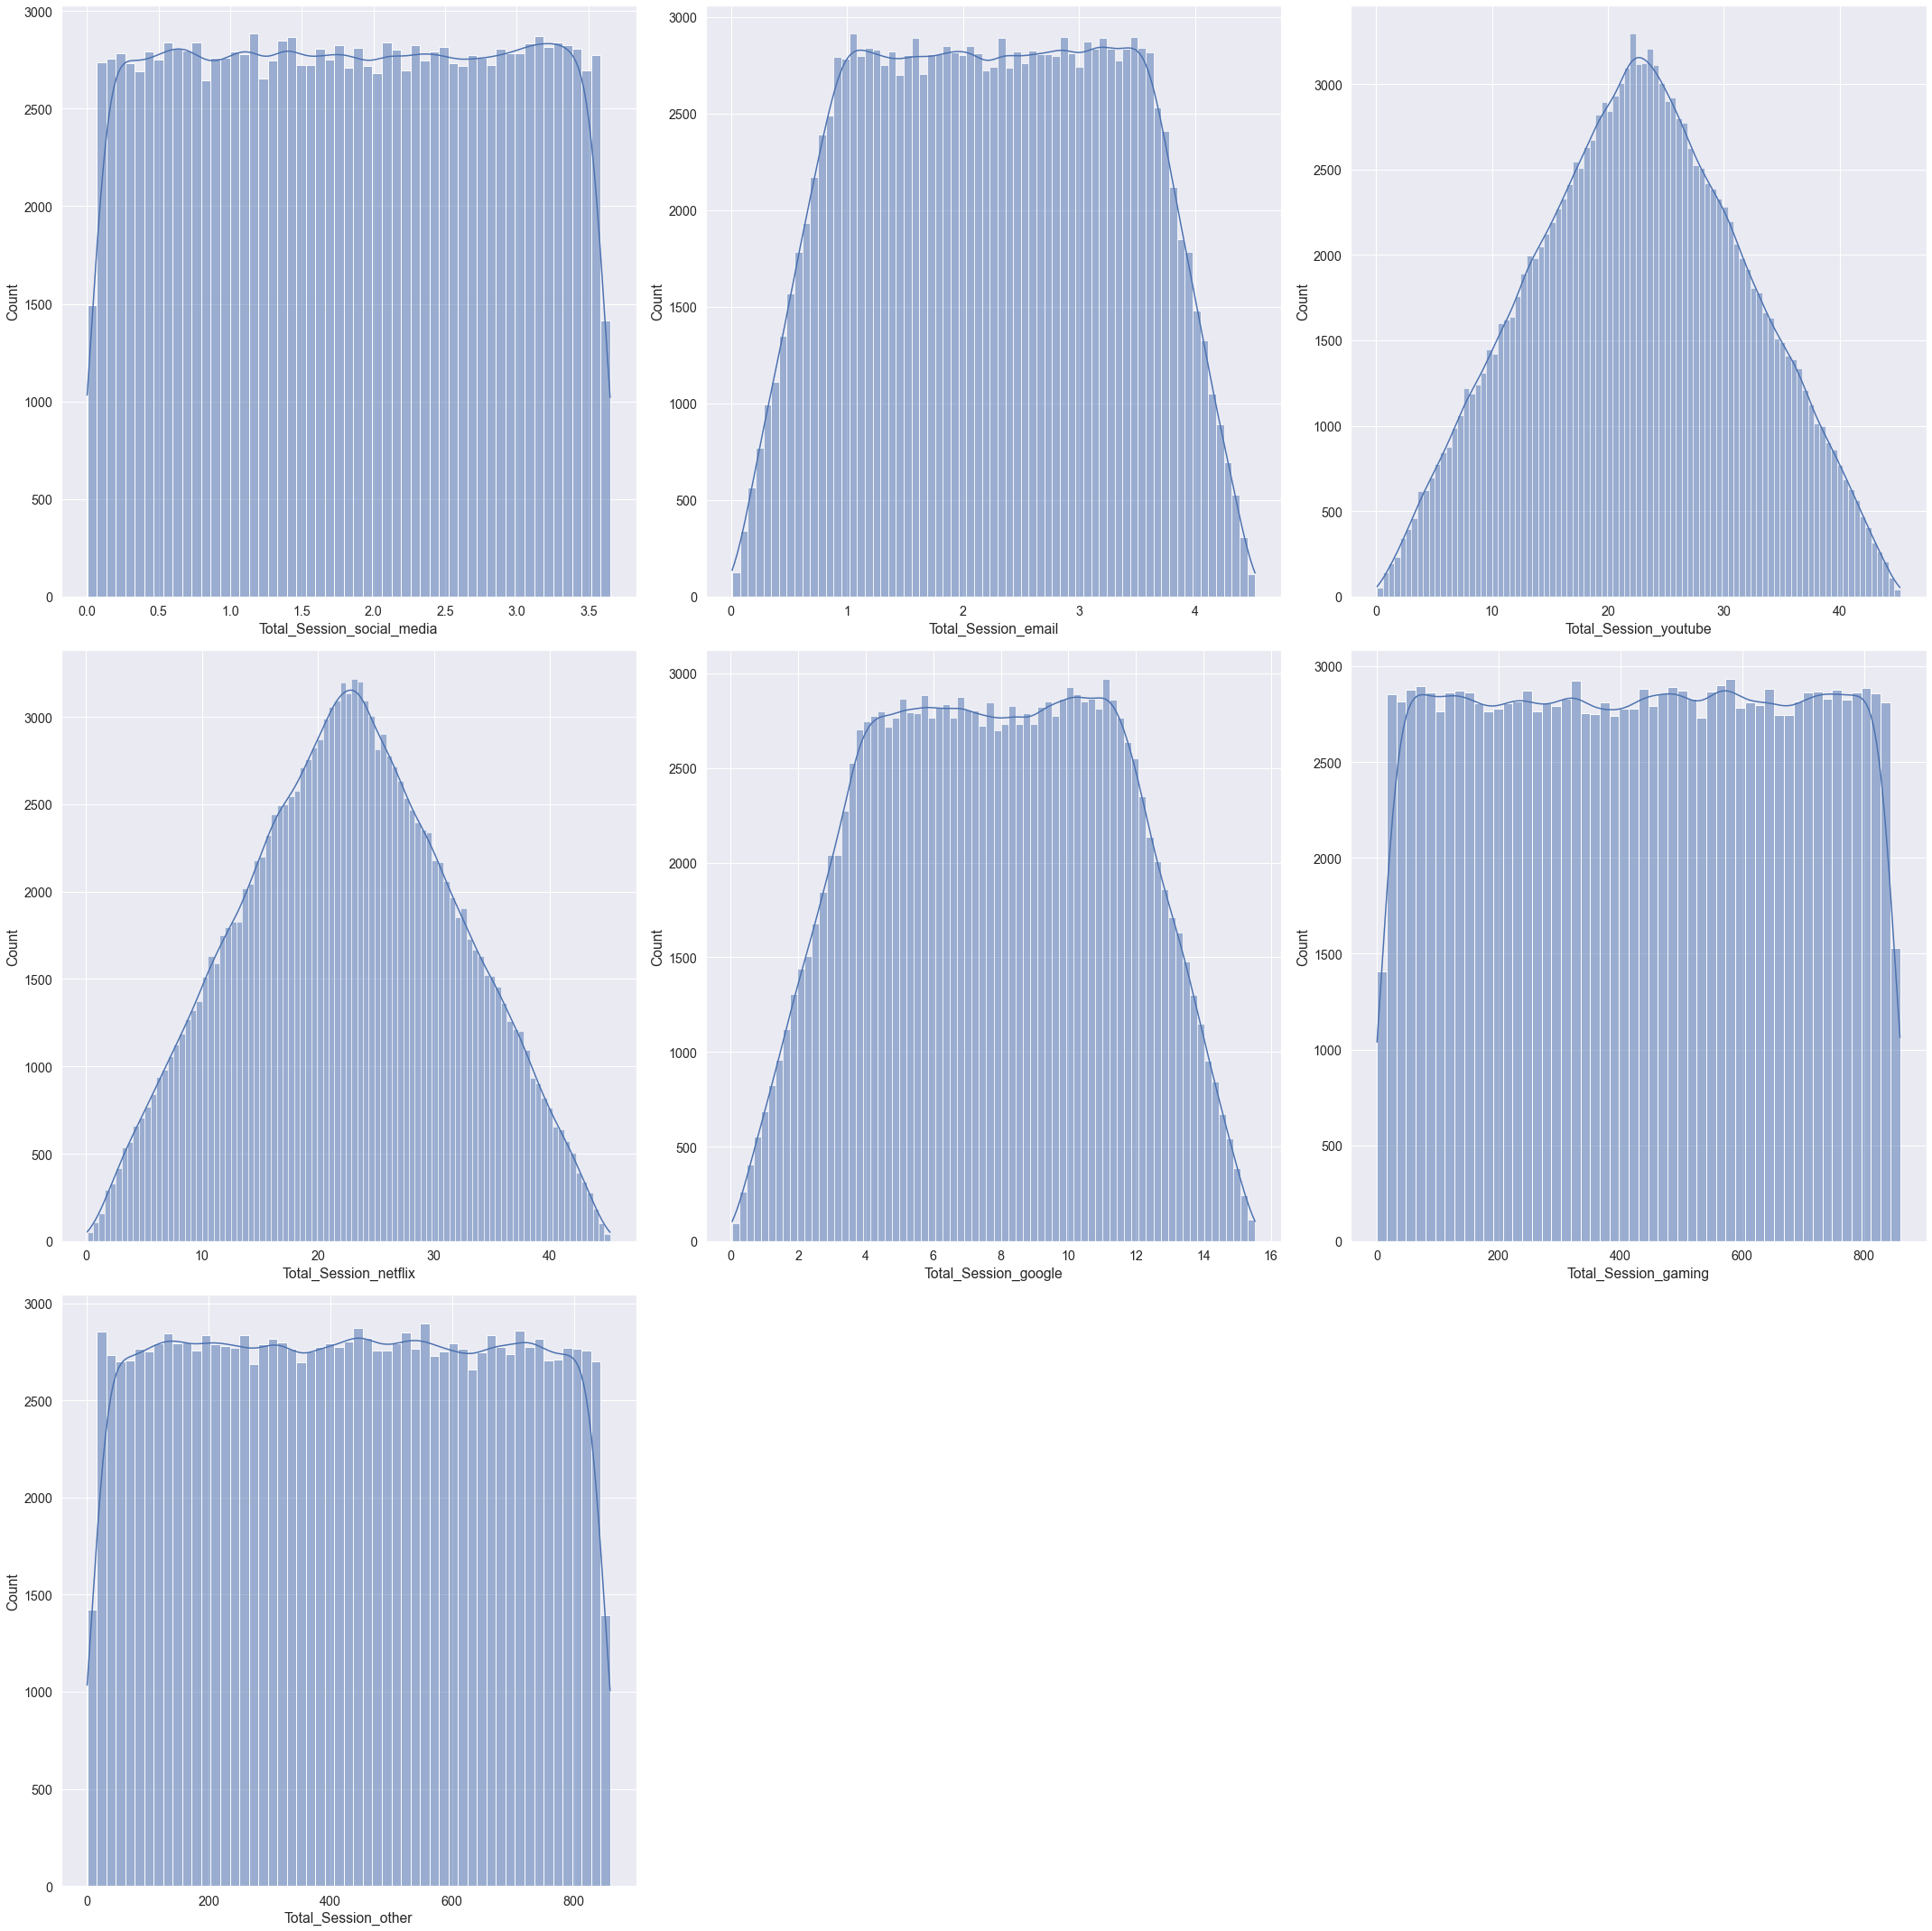

In [369]:
cols = 3
rows = 3
# num_cols = df.select_dtypes(include=['float', 'int']).columns
num_cols = df[imp_features].columns
fig = plt.figure( figsize=(cols*10, rows*10))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.histplot(x = df[col], ax = ax, kde = True)
    
fig.tight_layout()  
plt.show()

<b>`Analysis`</b>

`The chart above confirms most of the data attributes are normally distributed. Normal Distribution is a histogram chart that has a bell shape. like the Total Session Netflix or the rest of the quatitative variables.`

<b>`Bivariate Analysis`</b> 

`– explore the relationship between each application.`